# 워드 클라우드 및 자연어 처리

In [1]:
# import nltk 
# # punkt, stopwords download
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [41]:
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re, joblib
import konlpy
from konlpy.tag import Okt 
okt = Okt()
import string

In [42]:
os.chdir('/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data/')

In [44]:
ls

 elecafe.csv
'pietest (df1798e6) (d8200025) (d8200025).png'
'pietest (df1798e6) (df1798e6) (df1798e6) (df1798e6).png'
 관련키워드.csv
'긍부정 (4de45444) (4de45444).png'
 네이버-제주전기차후기통합.csv
 느영나영전기차크롤링.csv
 느영나영전기차크롤링.csv.part
'본문 검색 결과_2022.03.06.xlsx'
'전기차 동호회 전기차크롤링.csv'
 전기차관련검색어인기순.csv
 전기차관심도지역.csv
 전기차관심증가.csv
 전기차키워드관련주제인기순.csv
 전체본문의댓글결과_2022.03.06.xlsx
 제사모크롤링.csv
 투플럭스sjeju.csv


In [45]:
df_naver= pd.read_csv('네이버-제주전기차후기통합.csv')

In [9]:
df = pd.read_csv('/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data/elecafe.csv')

In [5]:
pwd

'/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis'

In [35]:
df.카페명.unique()

array(['제사모', '느영나영', '전기차동호회'], dtype=object)

In [36]:
df[df.카페명=='전기차동호회']

,제목,내용,댓글,유형,조회수,작성날짜,월별,카페명,년별
3566,금융치료,완료하였습니다. \n나라에 세금이나 좀 더 충당해라..\n,크~~~ 정의구현에 마음이 시원해집니다 ㅎ\n^^\n번호가리세요!!\n헉 고맙습니다...,제주특별자치도,"6,136",2022.02.25.,2022.02,전기차동호회,2022
3567,경부하시간 차이,육지랑 제주랑 경부하시간이 다르더라고요.\n육지는 11시부터 9시.\n제주는 10시...,제주도는 하루일과를 일찍 시작해서 일찍 끝내서가 아닐까요?\n참고로 저는14년부터 ...,제주특별자치도,"6,776",2022.03.04.,2022.03,전기차동호회,2022
3568,제주도 여행지 추천 부탁드립니다.,제가 결혼기념일 즈음하고 \n얼마전 인연을 맺은 사돈내외와 제주도 여행을 하려고 합...,제주 가시면 해돋이보러 성산 일출봉 꼭 가보셔요. 한해에 해돋이 볼수 있는 날은 얼...,제주특별자치도,"1,973",2022.03.14.,2022.03,전기차동호회,2022
3569,제주 폴스타,제주도 폴스타 오픈예정이던대 \n\n정확한 시기는 안나온건가요?\n\n혹시 카페에서...,제주매장은 언제 예정인지는 잘모르겠네요\n\n사전계약자들중 기존 생산물량 잡은신분들...,제주특별자치도,742,2022.03.14.,2022.03,전기차동호회,2022
3570,경매에 BMW i3가 왕창 나왔네요~,http://www.jejusori.net/news/articleView.html?...,수리해서 탈만한차는 몇없을거에요\n그니깐요~\n저렇게 처리할 보조금 있으면…\n좋은...,제주특별자치도,944,2022.03.12.,2022.03,전기차동호회,2022
...,...,...,...,...,...,...,...,...,...
5910,[링크스크랩] 100% 순수 전기차 ‘SM3 Z.E.’ 보급 위해 특별 할인 제공,출처\n뉴스>동아일보 | 네이버 뉴스,정부 보조금 까지 받게 된다면 엄청 싸게 살수 있겠네요....서울에서 다시 보조금 ...,제주특별자치도,111,2015.03.08.,2015.03,전기차동호회,2015
5911,"[링크스크랩] 자동차 업계, 제주도 전기차 민간 보급 공모 총력전…가격 인하 이어져",출처\n뉴스>전자신문 | 네이버 뉴스,쏘울 내일 받는데 100만원 낮아지다니....ㅠㅠ\n서울도 다시한번더 보조금 지원하...,제주특별자치도,84,2015.03.04.,2015.03,전기차동호회,2015
5912,등업부탁해요 하반기 전기차를 신청하고싶었는데,하반기 전기차를 신청하고싶었는데\n주차장문제로 못하로 내년 상반기를 기대합니다\n등...,반가워요~~😊\n내년에 제주도 전기차 공급량이 대박이던데 좋은소식 있으시길...\n...,제주특별자치도,76,2014.10.26.,2014.10,전기차동호회,2014
5913,ㅇㅇ,ㅇ,0\n,제주특별자치도,35,2014.06.21.,2014.06,전기차동호회,2014


In [16]:
df.head(3)

,제목,내용,댓글,유형,조회수,작성날짜,월별,카페명,년별
0,봉고3더블캡,"※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n...",가격이 궁금해요..^^\n얼마인가요ㅡ\n,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서. 렌트카 알아보고 있어요. 육지에...,요즘 전기차가 대세기도 하지만 가스값 장난아니게 올랏어요...또한 한달살기라면 자차...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022
2,더 뉴 아이오닉 일렉트릭N 20년형 흰색7만 현대스마트센스 l추가 완전무사고/믿고사...,★ 차량 정보 ★\n\n▶▷모델명 : 더 뉴 아이오닉 일렉트릭 N 전기차\n\n▶▷...,내용없음,중고자동차 매물,62,2022.03.16.,2022.03,제사모,2022


In [46]:
userwant = df_naver.내용.copy()
userwant.dropna(inplace=True)
userwant.reset_index(inplace=True,drop=True)
userwant_list=userwant.values


sum_list = []
for i in range(len(userwant_list)):
    sum_list+=userwant_list[i].split(',')
len(sum_list)


15552

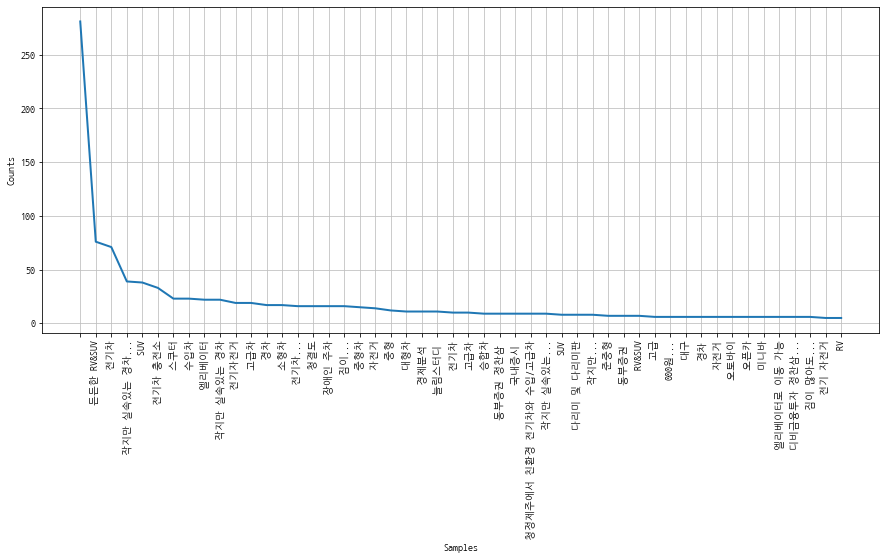

<Figure size 432x288 with 0 Axes>

In [47]:
elc_use = nltk.Text(sum_list, name='내용')
plt.figure(figsize=(15,6))
elc_use.plot(50)
plt.show()
plt.savefig('빈도수파악.png')

In [51]:
data = elc_use.vocab().most_common(300)
data[:20]

[('', 281),
 (' 든든한 RV&SUV', 76),
 (' 전기차', 71),
 (' 작지만 실속있는 경차...', 39),
 (' SUV', 38),
 (' 전기차 충전소', 33),
 (' 스쿠터', 23),
 (' 수입차', 23),
 (' 엘리베이터', 22),
 (' 작지만 실속있는 경차', 22),
 (' 전기자전거', 19),
 (' 고급차', 19),
 (' 경차', 17),
 (' 소형차', 17),
 (' 전기차...', 16),
 (' 청결도', 16),
 (' 장애인 주차', 16),
 (' 짐이...', 16),
 (' 중형차', 15),
 (' 자전거', 14)]

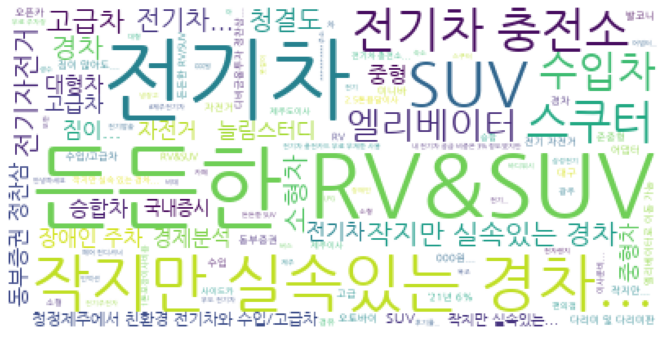

<Figure size 432x288 with 0 Axes>

In [50]:
wc = WordCloud(
    font_path='NanumGothic.ttf',
    relative_scaling=0.00001,
    background_color='white'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()
plt.savefig('elc_usewordcloud.png')